# Using *for*-loops to calculate MLU (in words)
The purpose of this notebook is to practice using *for*-statements. We will use *for*-loops to calculate MLU in words, because this is easier than calculating MLU in morphemes. The procedure would be in principle the same, however. Working with morphemes is just harder, because it requires parsing tagged data, which can be a pain in the butt. So let's keep it simple.

## Getting set up
We can use the first cell or cells in the notebook to get our workspace set up. As an example, if we know that we will need certain packages, then it is nice to import them all at the beginning. Of course, we can always import them later, as needed. It can also make things easier to define some path variables at the beginning. I often use ``pathin`` to define where my data are going to come from, and ``pathout`` to define where files that the script creates will be saved. Putting these in variables at the top, rather than "hard-coding" them into your script makes it easier to keep track of, easier to call, and easier to change.

## Importing packages

Part of the strength of Python is the many "packages" available, which are pre-written code that can do things for you. You can load these by writing ``import`` and then the name of the package. But you can also import *parts* of packages, and you can also give them new names. Often people import parts of packages and give them an abbreviation. There is a useful package called ``os`` which helps with navigating around in your file system, e.g. pointing to folders where data are stores. In the code below, I only import the part of ``os``called ``chdir``("change directory"). Also *I* like to rename it ``cd``, because that is shorter, and it is the same command for changing directories in Unix. But you could call it whatever you like, or not change the name at all.

In [59]:
from os import chdir as cd
pathin = '/Users/ethan/Documents/GitHub/CLA_2019/Coding/Friday Exercises/Data/Brown_MOT/Adam'
file = 'adam01.cha'

## Loading transcript data

The entire Brown corpus is available on CHILDES. Here, I have extracted Adam's mom's utterances. With the code below, we can read the data into python, and print the first 100 characters, just to check that it looks right. Remember, ``pathin ``and ``file``are both strings which were defined in the cell above.

When we ``open``the file below, we make it available to python as an object called ``f``. We could do many different things with ``f``. To see a list of these options, type ``dir(f)``. In this case, we want to read it into a variable, which I have called ``text``.

In [60]:
# change to the directory where the data are stored
cd(pathin)

# read in the contents of the file
with open(file, 'r') as f:
    text = f.read()

# print the first 100 characters, just to make sure everything looks right.    
print(text[0:100])

big drum
horse
who is that
those are checkers
two checkers  yes
play checkers
big horn
get over  Mom


## Make the data into a list

If you type ``type(text)``, you will see that it is a string. But we want to calculate the mean length of utterance (MLU). This means we first need to know the length of each individual utterance. The we can add all of these utterance lengths together and divide by the number of utterances to get the mean. To do that, let's split the string into a list of utterances.

Each utterance is on a new line in the transcript. We can use the "new line" indicator ``\n``to tell python where to split the transcript, so that each utterance is one item in a list.

In [61]:
# divide the string "text" into a list, by splitting it on every newline ("\n")
text = text.split('\n')

# check that the command did what we wanted it to.
print(text[0:10])

['big drum', 'horse', 'who is that', 'those are checkers', 'two checkers  yes', 'play checkers', 'big horn', 'get over  Mommy', 'shadow', 'I like it']


## Appending to an empty list

A lot of programming involves patterns of commands. A very useful pattern in python is to first define an empty list, and then use a *for*-statement to loop through something, do some calculations, and then add the output to the empty list.

In [62]:
# set up an empty list
lu = []

# loop through the list of utterances
for utterance in text:

    # split each utterance into individual words. The default for "split" is to use whitespace.
    words = utterance.split()

    # count the number of words in each utterance
    num_words = len(words)

    # append the number of words in the utterance to the list "lu"
    lu.append(num_words)

In [63]:
# We can do a quick check, to make sure it worked.

print(text[0:5])
print(lu[0:5])

['big drum', 'horse', 'who is that', 'those are checkers', 'two checkers  yes']
[2, 1, 3, 3, 3]


## Calculating MLU

Now we are set up to calculate MLU. All we need to do is add up all the indivual utterance lengths, and divide by the number of utterances

In [64]:
# find mean length of utterance (in words)
mlu = sum(lu)/len(lu)
mlu

4.111607142857143

## Plotting the results

For fun, let's try looking at our data visually. We know Adam's mother used on average 4.1 words per utterance in this visit. But we also have the data for each individual utterance. It could be interesting to see whether the length of her utterances increased or decreased as the visit went on.

To plot these data, we need to import more packages. We need ``matplotlib.pyplot`` for plotting, ``seaborn``for making plotting easier, and ``pandas``for organizing our data in a "dataframe". You can think of a dataframe as sort of like a spreadsheet, with columns and rows. The conventional abbreviations for these packages are ``plt``, ``sns``, and ``pd``.

The first line, ``%matplotlib inline``, insures that the plot is shown within the jupyter notebook. Without it, python may try to open the plot somewhere else, and you might not be able to see it.

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Making a dataframe

Here we make dataframe with the individual utterance lengths we have extracted from Adam's mother's data. We can put these utterance lengths on the y-axis of our plot. To show the progression over the course of the visit, though, we also need an a-axis. We can get one by just generating a list of numbers that go in order from 1 to the total number of utterances (which would be ``len(lu)+1``). If you are not sure what the ``+1``is for, try running the following:

``for i in range(1,10,1):
    print(i)``

Once we have a list of visit numbers (which I have called ``utterances``) and a list of utterance lengths (in this case, ``lu``), we can use ``pd.DataFrame``to make a new dataframe.

In [76]:
utterances = list(range(1, len(lu)+1, 1))
df = pd.DataFrame(
    {'Utterance Number': utterances,
     'Length of Utterance': lu
    }) 

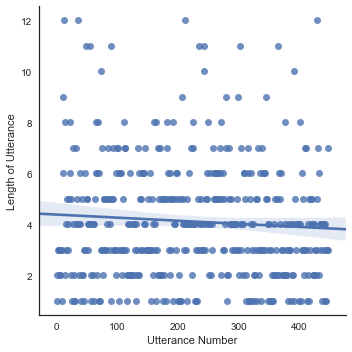

In [79]:
# At the time of writing this, there is some old-ish code in seaborn, which will make a red warning.
# Since this warning doesn't really have anything to do with us, we can ask python not to show us the warning.
# But I should warn you, it is normally it is probably a good idea to listen to warnings.
import warnings
warnings.filterwarnings("ignore")

sns.set_style("white")
sns.lmplot(x = "Utterance Number", y= "Length of Utterance", data = df)

## Exercise: Plot the Progression of Adam's mom's MLU over time

You now know how to plot Adam's mom's utterance length over the course of a single visit. With the addition of a single package (``glob``), you now have the tools to make a plot with Adam's mom's MLU on the y-axis, and visit number on the x-axis, which may be more interesting from a developmental-theoretical point of view.

### Quiz
1. We know from Brown's graph that Adam's MLU goes up over time. Will his mom's MLU go up, go down, or stay the same over the 55 visits Brown and his students made? What is your prediction?
2. Write a script that calculates this, and plots it.
3. Was your prediction right?

To keep things neat and tidy, I reccomend starting a new notebook to do the quiz. Below, I provide you with the first cells. As you can see, these cells will get you a list called ``mot_Adam`` which is a list of lists: Each list in ``mot_Adam`` is list of all Adam's mom's utterances for each visit (each of the 55 Adam transcripts). **HINT:** I suggest *nesting* your *for*-loops, so you can loop through each utterance in each transcript.

In [85]:
from os import chdir as cd
import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# remember to replace with your own path
pathin = '/Users/ethan/Documents/GitHub/CLA_2019/Coding/Friday Exercises/Data/Brown_MOT/Adam'

In [86]:
cd(pathin)
mot_Adam = []
for file in glob.glob('*.cha'):
    with open(file,'r') as f:
        text = f.read()
        text = text.split('\n')
        mot_Adam.append(text)
print(type(mot_Adam))
print(len(mot_Adam))

<class 'list'>
55
